In [24]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import librosa
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from math import sqrt
from scipy import stats
from mlxtend.plotting import plot_decision_regions
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_predict, cross_val_score,cross_validate
#%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import time
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [2]:
def createTrainingData(start, end):
    samples = []
    l1=[376,248,251]
    l2=[334,339,294]
     
    '''a,s=librosa.load("C:\\Users\\Dell\\Desktop\\appa.m4a")
    mfcc1= librosa.feature.mfcc(y=a,sr=s)
    newind=[]
    concatfeatures(newind,mfcc1)
    newind=np.asarray(newind)
    #for v in range(10):
    samples.append([newind[0],1))'''
   # print(newind[0])
    for q,r in zip (l1,l2):
       
        for i in range(1,10):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_00"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_00"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(10,100):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_0"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_0"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(100,430):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
   
    print(len(samples))
    X = [i[0] for i in samples]
    Y = [j[1] for j in samples]
    return X,Y

def concatfeatures(realdata, mfcc1):
    temp1=mfcc1.T[1][1:19]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:19]))
    #print(temp1)
    realdata.append(temp1)
    
def concatfeatures1(realdata, mfcc1):
    temp1=mfcc1.T[1][1:13]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:13]))
    #print(temp1)
    realdata.append(temp1)

In [3]:
data, label =createTrainingData(1,19)

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # * * * * * * * * * * * * * * # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * $ * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # * * * * * * * * * * * * * * # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)

In [5]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 1015), (1, 1015)]


In [6]:
Counter(label)

Counter({0: 1269, 1: 1032})

In [26]:
s = time.time()
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=len(X_resampled[1]), units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_resampled, y_resampled, batch_size = 10, epochs = 50,verbose=0)
y_pred = classifier.predict(np.array(X_test))
print(time.time()-s)

18.330911874771118


In [27]:
score = classifier.evaluate(np.array(X_test), np.array(y_test), batch_size=2000)
score
confusion_matrix(np.array(y_test), y_pred.round())

461/461 [==============================] - 0s 583us/step


array([[252,   2],
       [  7, 200]])

In [9]:
X_train = np.asarray(X_train)
X_train.shape

(1840, 738)

In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
(tn, fp, fn, tp)

(249, 5, 7, 200)

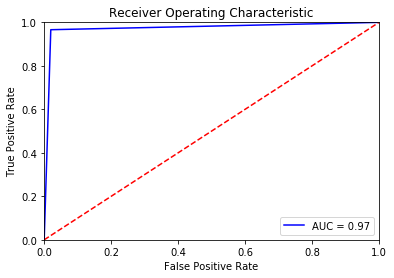

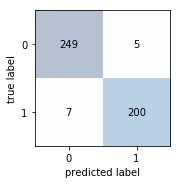

In [11]:
def plotCurve(y_test1,y_pred,name):   
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    name = '../'+name+'.png'
    plt.savefig(name)
    plt.show()
    return roc_auc
auc = plotCurve(y_test,y_pred.round(),'nn-aoc')

binary = confusion_matrix(y_test,y_pred.round())
fig, ax = plot_confusion_matrix(conf_mat=binary)
n = '../nn.png'
plt.savefig(n)
plt.show()

In [12]:
precision = round(tp/(tp+fp),4)
recall = round(tp/(tp+fn),4)
fmeasure = round(2*((precision*recall)/(precision+recall)),4)
rej = round(tn/(tn+fp),4)
acc = round((tn+tp)/(tn+tp+fp+fn),4)

In [19]:
%time
print(precision,recall,fmeasure,rej,acc)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 22.6 µs
0.9756 0.9662 0.9709 0.9803 0.974


In [17]:
def nn():
    classifier = Sequential()
    classifier.add(Dense(activation="relu", input_dim=len(X_resampled[1]), units=6, kernel_initializer="uniform"))
    classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
    classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

neural_network = KerasClassifier(build_fn=nn, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)
score = cross_val_score(neural_network, np.array(data),np.array(label), cv=10)
score.mean(), score.std()

(0.9534989658944377, 0.022511226052136988)